In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits
from astropy.modeling.blackbody import blackbody_lambda

sys.path.insert(0, '../')

In [60]:
f = fits.open('../libra/data/trappist1/mage_2306-0502_090827.fits')

wavelength = f[0].data[0, :] #* u.Angstrom
flux = f[0].data[1, :] #* u.erg * u.s**-1 * u.cm**-2 * u.Angstrom**-1
#flux = flux.to(u.W * u.m**-2 * u.um**-1)
flux[(flux < 0) | np.isnan(flux)] = 0

In [106]:
tbl = ascii.read('../libra/data/filters/kepler_response_hires1.txt')
kepler_wavelengths, kepler_trans = tbl['col1'].data*10, tbl['col2'].data

halpha_wavelengths = np.linspace(6500, 6600)
halpha_trans = np.zeros_like(halpha_wavelengths)
near_line = np.abs(halpha_wavelengths - 6562.8) < 5
halpha_trans[near_line] = 1

trans_kepler = lambda x: np.interp(x, kepler_wavelengths, kepler_trans, left=0, right=0)
trans_halpha = lambda x: np.interp(x, halpha_wavelengths, halpha_trans, left=0, right=0)

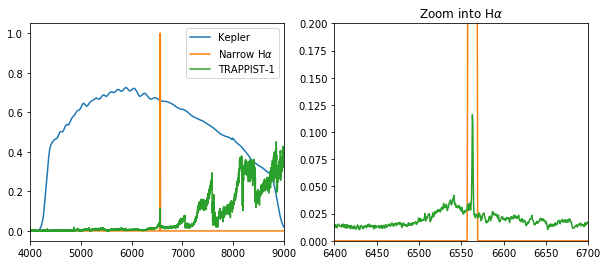

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for axis in ax:
    axis.plot(wavelength, trans_kepler(wavelength), label='Kepler')
    axis.plot(wavelength, trans_halpha(wavelength), label=r'Narrow H$\alpha$')
    axis.plot(wavelength, flux/flux.max(), label='TRAPPIST-1')
ax[0].set_xlim([4000, 9000])

ax[1].set_xlim([6400, 6700])
ax[1].set_ylim([0, 0.2])


ax[0].legend()
ax[1].set_title(r'Zoom into H$\alpha$')
plt.savefig('halpha.png', dpi=250)

In [108]:
flux_kepler = np.trapz(wavelength * trans_kepler(wavelength) * flux, wavelength)
flux_halpha = np.trapz(wavelength * trans_halpha(wavelength) * flux, wavelength)

flux_ratio = flux_halpha/flux_kepler

In [109]:
flux_ratio

0.0022857713151951749

In [110]:
0.927/0.940

0.9861702127659575